In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])

In [7]:
dataset = ImageFolder(root=r'C:\Users\Asus\OneDrive\Documents\SEM 6\DL\DL LAB\DL_033\ex2\Cars Dataset', transform=transform)

dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [8]:
class RBFNetwork(nn.Module):
    def __init__(self, input_size, num_classes, num_rbf_units=100):
        super(RBFNetwork, self).__init__()
        self.num_rbf_units = num_rbf_units
        self.centers = nn.Parameter(torch.rand(num_rbf_units, input_size))
        self.sigma = nn.Parameter(torch.ones(num_rbf_units))
        self.linear = nn.Linear(num_rbf_units, num_classes)

    def forward(self, x):
        squared_distances = torch.sum((x.unsqueeze(1) - self.centers) ** 2, dim=2)
        rbf = torch.exp(-squared_distances / (2 * self.sigma ** 2))
        output = self.linear(rbf)
        return output

In [17]:
input_size = 224 * 224 * 3
num_classes = len(dataset.classes)
learning_rate = 0.001
num_epochs = 5

In [18]:
model = RBFNetwork(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
losses=[]
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        inputs = inputs.view(inputs.size(0), -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

Epoch [1/5], Loss: 0.6819748878479004
Epoch [2/5], Loss: 0.5316844582557678
Epoch [3/5], Loss: 0.5658700466156006
Epoch [4/5], Loss: 0.5415409803390503
Epoch [5/5], Loss: 0.696453869342804


In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in dataloader:
        inputs = inputs.view(inputs.size(0), -1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy on the test set: {100 * accuracy:.2f}%')

Text(0, 0.5, 'Training loss')

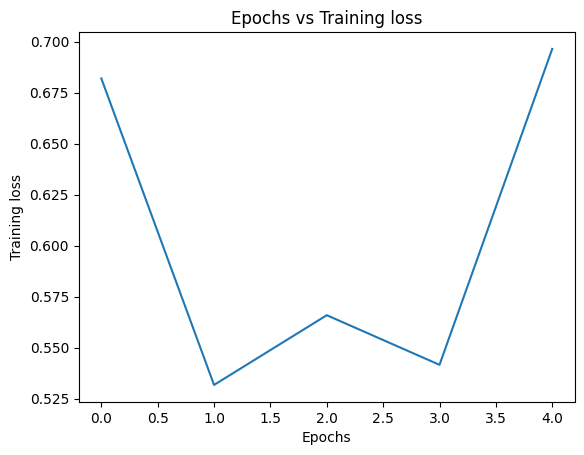

In [21]:
plt.plot([i for i in range(num_epochs)],losses)
plt.title("Epochs vs Training loss")
plt.xlabel("Epochs")
plt.ylabel("Training loss")